SMS Detection Classifier

In [187]:
import numpy as numpy
import pandas as pd

In [188]:
df= pd.read_csv('spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [189]:
df.shape

(5572, 5)

## Data Cleaning
## EDA
## Text Preprocessing
## Model Building
## Evulation
## Improvemets

In [190]:
##Data Cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [191]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [192]:
#rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4678,ham,Sry da..jst nw only i came to home..
3817,spam,74355 XMAS iscoming & ur awarded either å£500 ...
4923,ham,We can go 4 e normal pilates after our intro...
4606,ham,Been running but only managed 5 minutes and th...
4165,ham,Well if I'm that desperate I'll just call arma...


In [193]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['target']=encoder.fit_transform(df['target'])
df.sample(5)


,target,text
183,0,"He will, you guys close?"
469,0,There are many company. Tell me the language.
4962,0,I want to see your pretty pussy...
1395,0,Thats cool! I am a gentleman and will treat yo...
4648,0,Please protect yourself from e-threats. SIB ne...


In [194]:
#check Missing Values
df.isnull().sum()


target    0
text      0
dtype: int64

In [195]:
#check Duplicated values
df.duplicated().sum()

403

In [196]:
#remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

## EDA

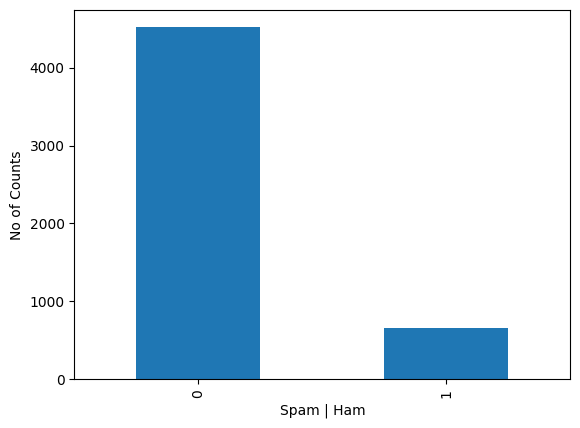

In [197]:
import matplotlib.pyplot as plt
df['target'].value_counts()
#convert the above value to historgram
df['target'].value_counts().plot(kind='bar')
plt.xlabel("Spam | Ham")
plt.ylabel("No of Counts")
#plot the graph
plt.show()


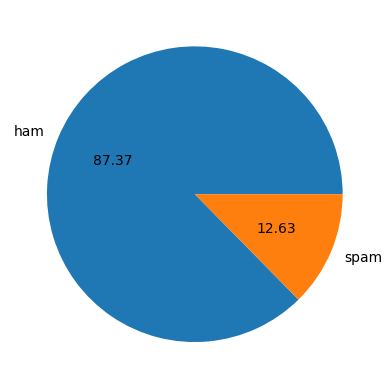

In [198]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [199]:
#Data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saqib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [201]:
#number of words
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [202]:
df['Sentence Count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,word_count,Sentence Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [203]:
df[['num_characters','word_count','Sentence Count']].describe()

,num_characters,word_count,Sentence Count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [204]:
df[df['target']==0][['num_characters','word_count','Sentence Count']].describe()
#show the above as a chart

#spam
df[df['target']==0][['num_characters','word_count','Sentence Count']].describe()

#show the above as a chart
#ham
df[df['target']==1][['num_characters','word_count','Sentence Count']].describe()


,num_characters,word_count,Sentence Count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

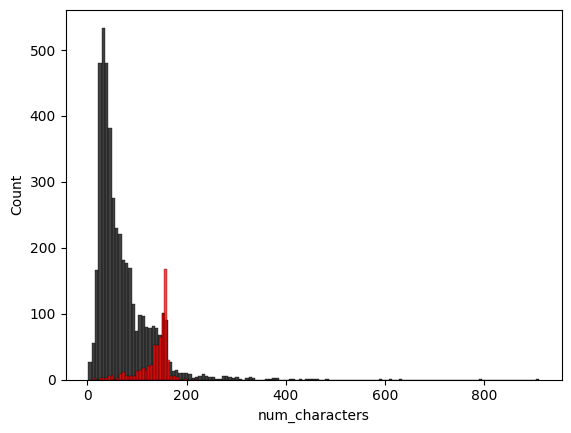

In [205]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'],color='black')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

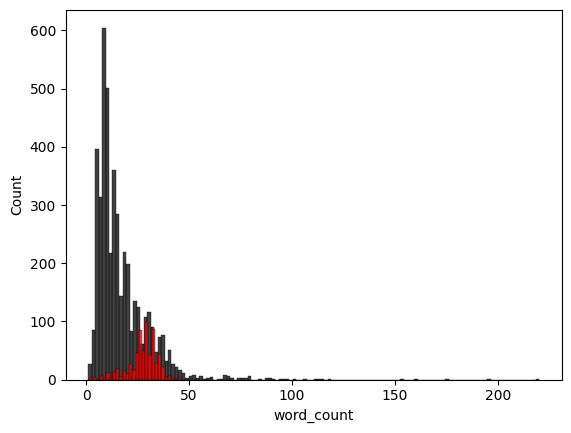

In [206]:
sns.histplot(df[df['target']==0]['word_count'],color='black')
sns.histplot(df[df['target']==1]['word_count'],color='red')

<AxesSubplot:xlabel='Sentence Count', ylabel='Count'>

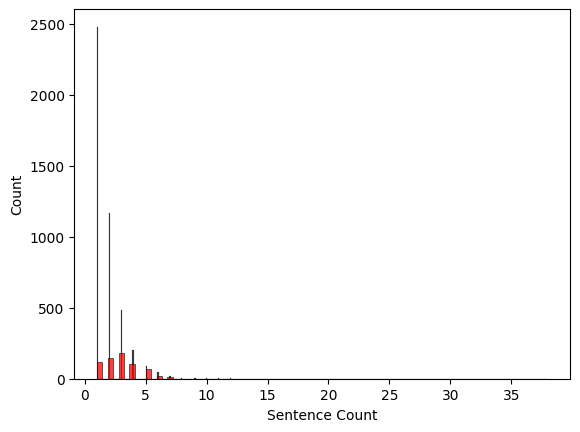

In [207]:
sns.histplot(df[df['target']==0]['Sentence Count'],color='black')
sns.histplot(df[df['target']==1]['Sentence Count'],color='red')

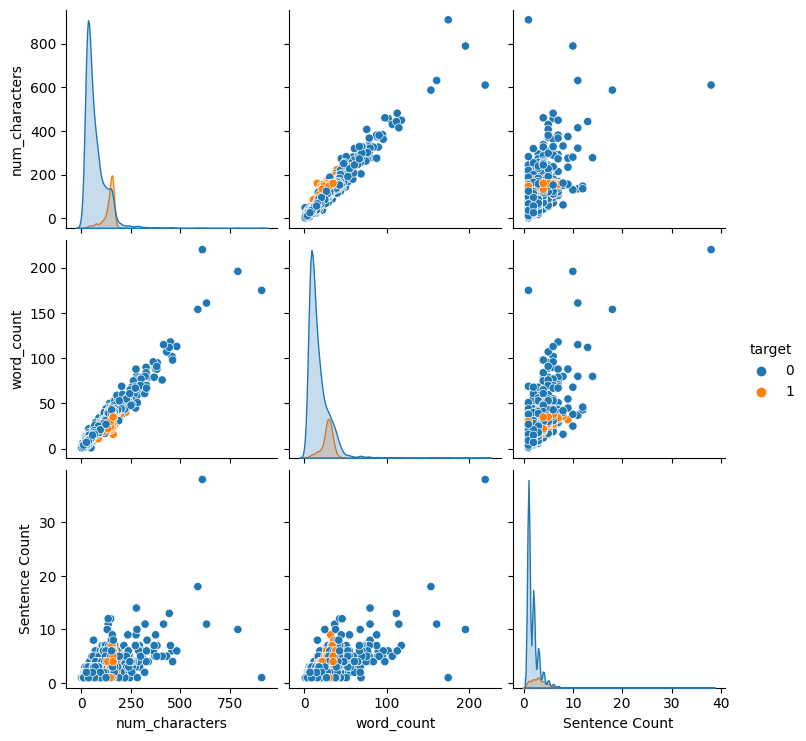

In [208]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

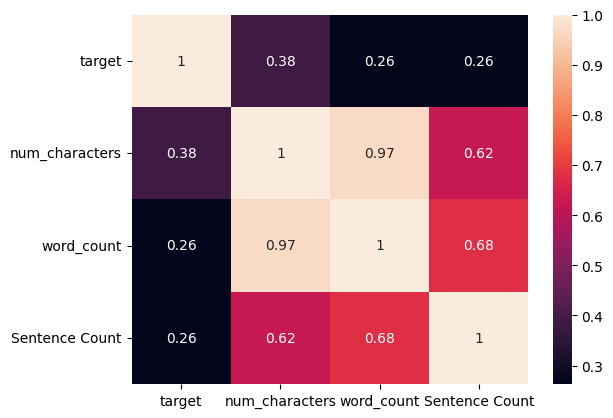

In [209]:
sns.heatmap(df.corr(),annot=True)

In [210]:
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saqib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

we will Choose the Target and Num_characters as with Remaining columns they are so much collinear.

## Data Preprocessing


In [211]:
from nltk.corpus import stopwords
import string
 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
   
    return " ".join(y)




In [212]:
df['transform_text']=df['text'].apply(transform_text)


In [213]:
df.head()

,target,text,num_characters,word_count,Sentence Count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Making World Cloud

In [214]:
# from wordcloud import WordCloud
# wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')
# #spam
# spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
# plt.imshow(spam_wc)
# #ham
# spam_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
# plt.imshow(spam_wc)

In [215]:
#Find the most word used in spam Messages
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [216]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

c:\Users\saqib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


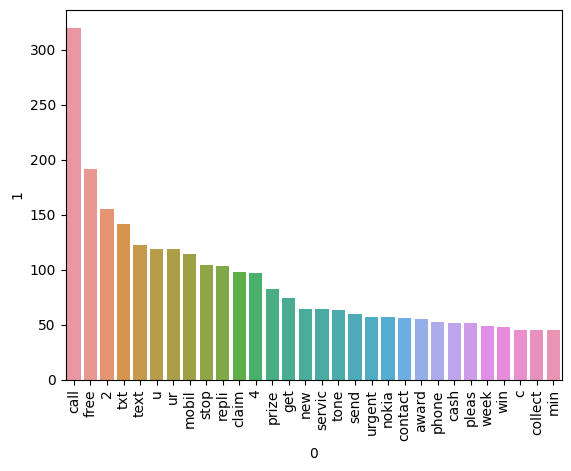

In [217]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [218]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

c:\Users\saqib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


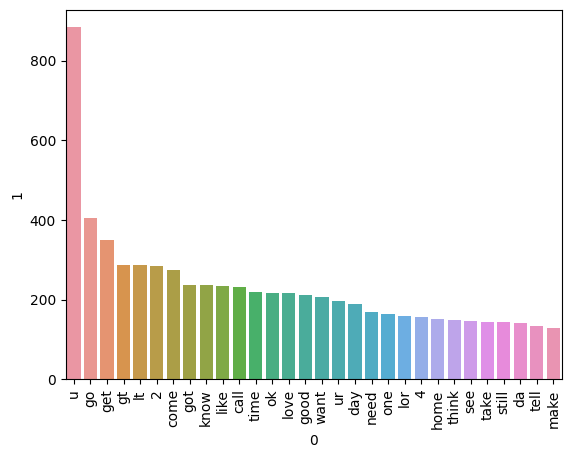

In [219]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [220]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [221]:
x= tfidf.fit_transform(df['transform_text']).toarray()
x.shape


(5169, 6708)

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [223]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [225]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

y_pred1=gnb.predict(x_test)
y_pred2=mnb.predict(x_test)
y_pred3=bnb.predict(x_test)

print("This is For GaussianNB")
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

# print("\n This is For MultinomialNB")
# print(confusion_matrix(y_test,y_pred2))
# print(accuracy_score(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))

print("\n This is For BernoulliNB")
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))



This is For GaussianNB
[[786 110]
 [ 18 120]]
0.8762088974854932
0.5217391304347826
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       896
           1       0.52      0.87      0.65       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034


 This is For BernoulliNB
[[893   3]
 [ 28 110]]
0.9700193423597679
0.9734513274336283
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



#### We Can See Clearly with BernoulliNB The Precision and Accuracy is much Larger.

In [226]:
#tfidf -> BNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [227]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [228]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [229]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [230]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9690522243713733, 0.9344262295081968)

In [231]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  0.863013698630137
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


In [232]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [233]:
performance_df
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


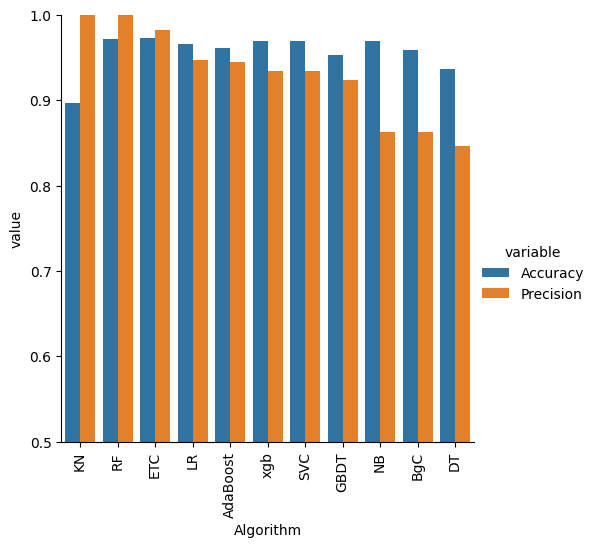

In [234]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [235]:
#model improve 
#change the max features

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
 

In [236]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [237]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [238]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
3,LR,0.966151,0.947826,0.966151,0.947826,0.966151,0.947826
4,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
5,xgb,0.970019,0.934959,0.970019,0.934959,0.970019,0.934959
6,SVC,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426
7,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
8,NB,0.969052,0.863014,0.969052,0.863014,0.969052,0.863014
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [239]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [240]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [241]:
voting.fit(x_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [242]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [243]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [244]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9545454545454546


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))